# APL Assignment 3

Name: Deepak Charan S

Roll no: EE23B022

Date: 9/9/24

Description:
To estimate various physical parameters using raw data (from the datasets) and Planck's formula.
To also implement partial application so that we can work with fewer unknowns at a time and get a better estimate on their value



In [38]:
import numpy as np  #importing useful librarie
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib ipympl

In [39]:
with open("d1.txt") as f:     #opening a file
  li = [line.strip().split(',') for line in f.readlines()]    #dividing the file into two columns


x1=[float(i[0]) for i in li]         #wavelength
y1=[float(i[1]) for i in li]         #spectral radiance

In [40]:
with open("d2.txt") as f:     #opening a file
  li = [line.strip().split(',') for line in f.readlines()]    #dividing the file into two columns


x2=[float(i[0]) for i in li]         #wavelength
y2=[float(i[1]) for i in li]         #spectral radiance


In [41]:
with open("d3.txt") as f:     #opening a file
  li = [line.strip().split(',') for line in f.readlines()]    #dividing the file into two columns


x=[float(i[0]) for i in li]         #wavelength
y=[float(i[1]) for i in li]         #spectral radiance



In [42]:
with open("d4.txt") as f:     #opening a file
  li = [line.strip().split(',') for line in f.readlines()]    #dividing the file into two columns


x4=[float(i[0]) for i in li]         #wavelength
y4=[float(i[1]) for i in li]         #spectral radiance

In [43]:
def general(x,h,c,k,t):
  return (2*h*c**2)/((np.power(x,5))*(np.exp((h*c)/(x*k*t))-1))   #Planck's formula


In [44]:
def error(real,exp):
  return abs((real-exp)/real)*100    #error function

In [45]:
hreal=6.626e-34
creal=3e8
kreal=1.38e-23

Curve fit:

We are using the scipy curve fit function to get a decent estimate on the parameters of Planck's formula

In [47]:
init=np.array([6.5e-34,2.7e8,1.3e-23,3000],dtype=float)    #initialising the parameters

(h,c,k,t),pcov=curve_fit(general,x,y,p0=init)    #fitting the data
ynew=[general(val,h,c,k,t) for val in x]  #plotting a curve with the coefficients provided by the above curve fit

plt.figure("General Estimate");plt.plot(x,y,x,ynew)
print(f"The value of h is {h} J.s")    #coeeficients derived from curve fit
print(f"The value of c is {c} m/s")
print(f"The value of k is {k} J/K")
print(f"The value of T is {t} K")
print()
print(f"Error of h is {error(hreal,h)} %")
print(f"Error of c is {error(creal,c)} %")
print(f"Error of k is {error(kreal,k)} %")

The value of h is 6.377524944601968e-34 J.s
The value of c is 297687911.89279824 m/s
The value of k is 1.428964281137663e-23 J/K
The value of T is 3733.3710684468783 K

Error of h is 3.7500008360705044 %
Error of c is 0.7706960357339183 %
Error of k is 3.5481363143233997 %


The value of h is 6.614692109504746e-34 J.s
The value of c is 296000943.15441203 m/s
The value of k is 1.5710483109978825e-23 J/K
The value of T is 3501.0787088703223 K


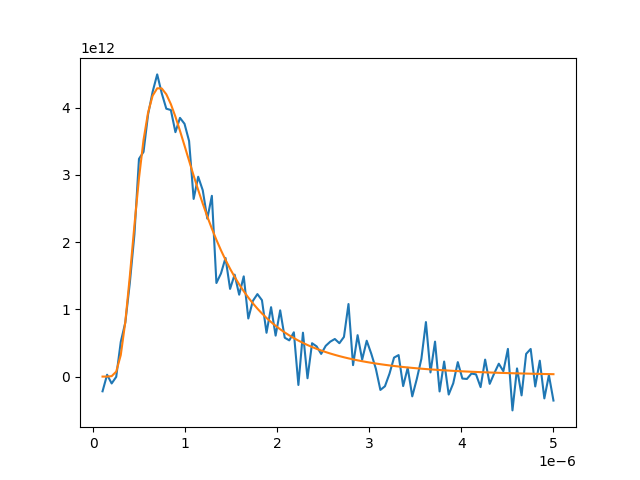

In [48]:
init=np.array([6.69e-34,2.7e8,1.3e-23,3000],dtype=float)    #initialising the parameters

(h,c,k,t),pcov=curve_fit(general,x1,y1,p0=init)    #fitting the data
ynew=[general(val,h,c,k,t) for val in x1]  #plotting a curve with the coefficients provided by the above curve fit

plt.figure("d1.txt");plt.plot(x1,y1,x1,ynew)
print(f"The value of h is {h} J.s")    #coeeficients derived from curve fit
print(f"The value of c is {c} m/s")
print(f"The value of k is {k} J/K")
print(f"The value of T is {t} K")

The value of h is 5.87339996571377e-34 J.s
The value of c is 256083594.65309423 m/s
The value of k is 1.4468313999489598e-23 J/K
The value of T is 3114.3119157237284 K


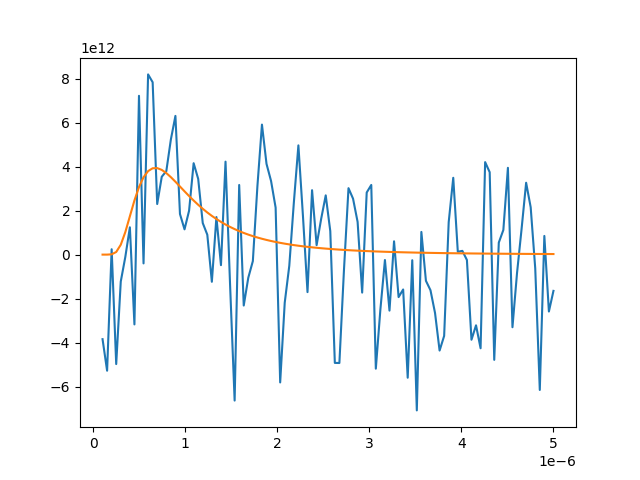

In [49]:
init=np.array([7.8e-34,2.65e8,1.15e-23,3000],dtype=float)    #initialising the parameters

(h,c,k,t),pcov=curve_fit(general,x2,y2,p0=init)    #fitting the data
ynew=[general(val,h,c,k,t) for val in x2]  #plotting a curve with the coefficients provided by the above curve fit

plt.figure();plt.plot(x2,y2,x2,ynew)
print(f"The value of h is {h} J.s")    #coeeficients derived from curve fit
print(f"The value of c is {c} m/s")
print(f"The value of k is {k} J/K")
print(f"The value of T is {t} K")

The value of h is 6.509387344027697e-34 J.s
The value of c is 294188790.5099417 m/s
The value of k is 1.6159648574094648e-23 J/K
The value of T is 3252.493742079783 K


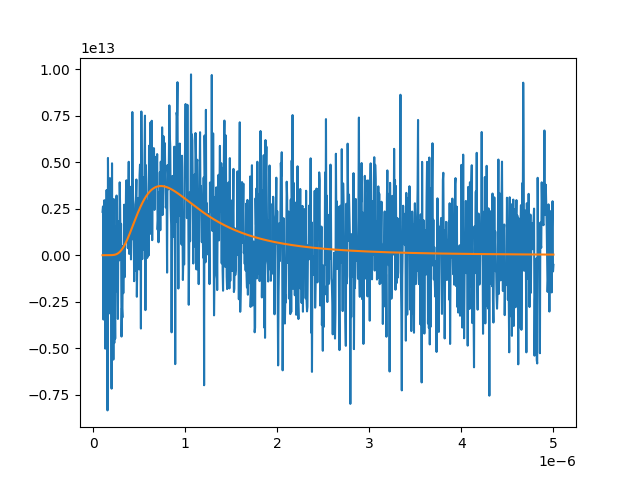

In [50]:
init=np.array([6.4e-34,2.7e8,1.35e-23,3002],dtype=float)    #initialising the parameters

(h,c,k,t),pcov=curve_fit(general,x4,y4,p0=init)    #fitting the data
ynew=[general(val,h,c,k,t) for val in x4]  #plotting a curve with the coefficients provided by the above curve fit

plt.figure();plt.plot(x4,y4,x4,ynew)
print(f"The value of h is {h} J.s")    #coeeficients derived from curve fit
print(f"The value of c is {c} m/s")
print(f"The value of k is {k} J/K")
print(f"The value of T is {t} K")

Partial Application:
vs
Now we fix an arbitrary value to 3 of our parameters and estimate the value of the 4th one

In [51]:
def partial_T(x,t):     #keeping only temperature variable
  h=6.6e-34
  c=3e8
  k=1.4e-23
  return (2*h*c**2)/((np.power(x,5))*(np.exp((h*c)/(x*k*t))-1))


The value of T is 3934.442566299032 K


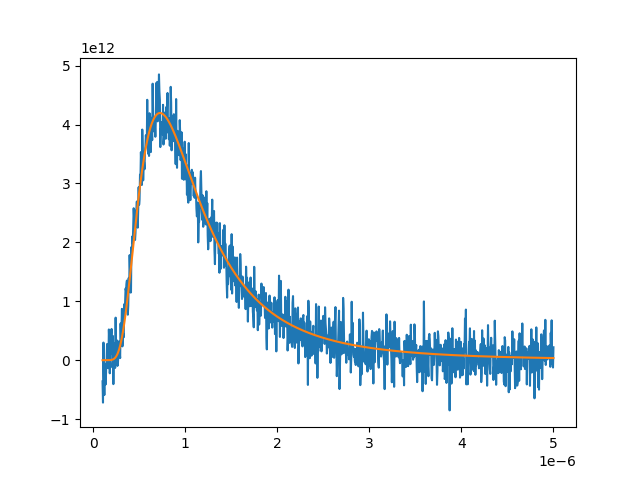

In [52]:
init=np.array([2000],dtype=float)
(pt),pcov=curve_fit(partial_T,x,y,p0=init)     #curve fit

ynew=[partial_T(val,pt) for val in x]

plt.figure();plt.plot(x,y,x,ynew)
print(f"The value of T is {pt[0]} K")     #best possible value of T derived from curve fit

In [53]:
def partial_h(x,h):     #keeping only h variable
  t=4001
  c=3e8
  k=1.38e-23
  return (2*h*c**2)/((np.power(x,5))*(np.exp((h*c)/(x*k*t))-1))


In [61]:
init=np.array([4e-33],dtype=float)
(ph),pcov=curve_fit(partial_h,x,y,p0=init)   #curve fit

ynew=[partial_h(val,ph) for val in x]

plt.figure("partial h");plt.plot(x,y,x,ynew)
print(f"The value of h is {ph[0]} J.s" )   #best possible value of h derived from curve fit
print(f"Error is {error(hreal,ph)[0]}%")

The value of h is 6.617492112018352e-34 J.s
Error is 0.12840156929743216%


In [55]:
def partial_c(x,c):     #keeping only c variable
  t=4001
  h=6.62e-34
  k=1.38e-23
  return (2*h*c**2)/((np.power(x,5))*(np.exp((h*c)/(x*k*t))-1))


In [60]:
init=np.array([2e8],dtype=float)
(pc),pcov=curve_fit(partial_c,x,y,p0=init)   #curve fit

ynew=[partial_c(val,pc) for val in x]

plt.figure("partial c");plt.plot(x,y,x,ynew)
print(f"The value of c is {pc[0]} m/s" )   #best possible value of c derived from curve fit
print(f"Error is {error(creal,pc)[0]} %")

The value of c is 299630678.96605307 m/s
Error is 0.12310701131564379 %


In [57]:
def partial_k(x,k):   #keeping only k variable
  t=4001
  c=3e8
  h=6.62e-34
  return (2*h*c**2)/((np.power(x,5))*(np.exp((h*c)/(x*k*t))-1))


In [59]:
init=np.array([2e-23],dtype=float)
(pk),pcov=curve_fit(partial_k,x,y,p0=init)     #curve fit

ynew=[partial_k(val,pk) for val in x]

plt.figure("partial_k");plt.plot(x,y,x,ynew)

print(f"The value of k is {pk[0]} J/K" )   #best possible value of k derived from curve fit
print(f"Error is {error(kreal,pk)[0]} %")

The value of k is 1.3800371901633906e-23 J/K
Error is 0.0026949393761240884 %
